1) gender: Whether the client is a female or a male (Female, Male).

2) SeniorCitizen: Whether the client is a senior citizen or not ( 0, 1).

3) Partner: Whether the client has a partner or not (Yes, No).

4) Dependents: Whether the client has dependents or not (Yes, No)

5) tenure: Number of months the customer has stayed with the company (Multiple different numeric values).

6) Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year).

7) PaperlessBilling: Whether the client has paperless billing or not (Yes, No).

8) PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)).

9) MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values).

10) TotalCharges: The total amount charged to the customer (Multiple different numeric values)

11) PhoneService: Whether the client has a phone service or not (Yes, No).

12) MultipleLines: Whether the client has multiple lines or not (No phone service, No, Yes).

13) InternetServices: Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No)

14) OnlineSecurity: Whether the client has online security or not (No internet service, No, Yes).

15) OnlineBackup: Whether the client has online backup or not (No internet service, No, Yes).

16) DeviceProtection: Whether the client has device protection or not (No internet service, No, Yes).

17) TechSupport: Whether the client has tech support or not (No internet service, No, Yes).

18) StreamingTV: Whether the client has streaming TV or not (No internet service, No, Yes).

19)StreamingMovies: Whether the client has streaming movies or not (No internet service, No, Yes)

20) Churn: Whether the client will churn or not(NO, YES).


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/Tel_Customer_Churn_Dataset.csv')

**Understanding the data**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Checking Null Values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Drop unwanted column
df.drop('customerID',axis=1,inplace=True)

In [ ]:
#checking datatypes.
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
#11 columns droped
df=df[df['TotalCharges']!=' ']
df.shape

(7032, 20)

**PRE-PROCESSING**

In [ ]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [ ]:
num=df.select_dtypes(include=[np.number])
cat=df.select_dtypes(exclude=[np.number])

In [ ]:
cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
for i in cat.columns:
  print(f'*********{i}************')
  print(df[i].value_counts())

*********gender************
Male      3549
Female    3483
Name: gender, dtype: int64
*********Partner************
No     3639
Yes    3393
Name: Partner, dtype: int64
*********Dependents************
No     4933
Yes    2099
Name: Dependents, dtype: int64
*********PhoneService************
Yes    6352
No      680
Name: PhoneService, dtype: int64
*********MultipleLines************
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
*********InternetService************
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
*********OnlineSecurity************
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
*********OnlineBackup************
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
*********DeviceProtection************
No                     3094
Yes    

In [ ]:
#replace 'no internet service' and 'no phone service as 'no'
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
for i in cat.columns:
  print(f'*********{i}************')
  print(df[i].value_counts())

*********gender************
Male      3549
Female    3483
Name: gender, dtype: int64
*********Partner************
No     3639
Yes    3393
Name: Partner, dtype: int64
*********Dependents************
No     4933
Yes    2099
Name: Dependents, dtype: int64
*********PhoneService************
Yes    6352
No      680
Name: PhoneService, dtype: int64
*********MultipleLines************
No     4065
Yes    2967
Name: MultipleLines, dtype: int64
*********InternetService************
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
*********OnlineSecurity************
No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64
*********OnlineBackup************
No     4607
Yes    2425
Name: OnlineBackup, dtype: int64
*********DeviceProtection************
No     4614
Yes    2418
Name: DeviceProtection, dtype: int64
*********TechSupport************
No     4992
Yes    2040
Name: TechSupport, dtype: int64
*********StreamingTV************
No     4329
Yes    2703

In [ ]:
df1=df.copy()

**Handling categorical variables.**

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for i in cat:
  df1[i]=le.fit_transform(df[i])

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


**FEATURE SCALING.**

In [ ]:
#select what columns to be scaled
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [ ]:
df1[cols_to_scale]=sc.fit_transform(df1[cols_to_scale])

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


**DATA VISUALIZATION**

In [ ]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

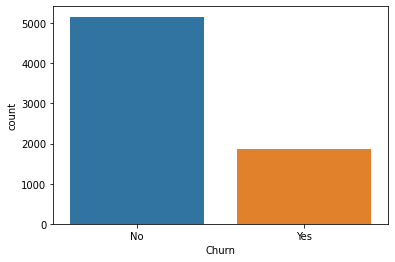

In [ ]:
sns.countplot(x="Churn",data=df)

*[0] - NOT CHURN

*[1] - CHURN

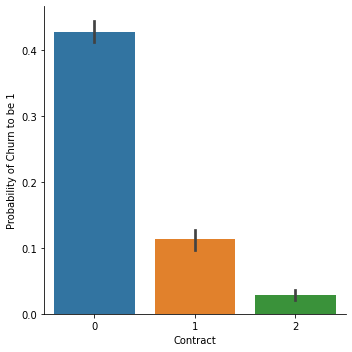

In [ ]:
v=sns.catplot(x="Contract", y="Churn", data=df1,kind="bar")
v.set_ylabels("Probability of Churn to be 1")

1)Customers are more likely to stop using service when the contract is month to month[0]

2)Least number of churn when a two year[2] contract is made

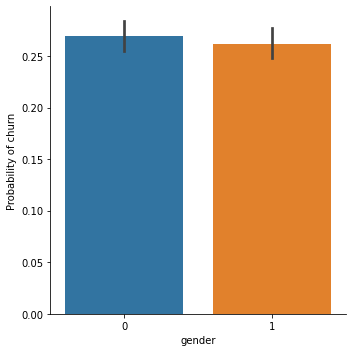

In [ ]:
a=sns.catplot(x="gender", y="Churn", data=df1,kind="bar")
a.set_ylabels("Probability of churn")

 Gender doesn't play a significant role in analysing whether a customer would churn.

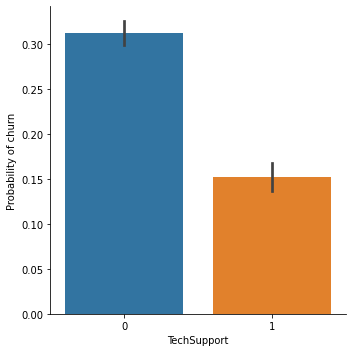

In [ ]:
b=sns.catplot(x="TechSupport", y="Churn", data=df1,kind="bar")
b.set_ylabels("Probability of churn")

In case of no tech support[0] , customers have high probability to churn.

**INDEPENDENT AND DEPENDENT VARIABLES**

In [ ]:
x=df1.drop('Churn',axis=1)

In [ ]:
y=df1['Churn']

In [ ]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

**handling imbalance dataset**

In [ ]:
import imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE()
x_s,y_s=smote.fit_resample(x,y)

In [ ]:
x_s.shape,y_s.shape

((10326, 19), (10326,))

NOW THE TARGET VARIABLE GETS BALANCED.

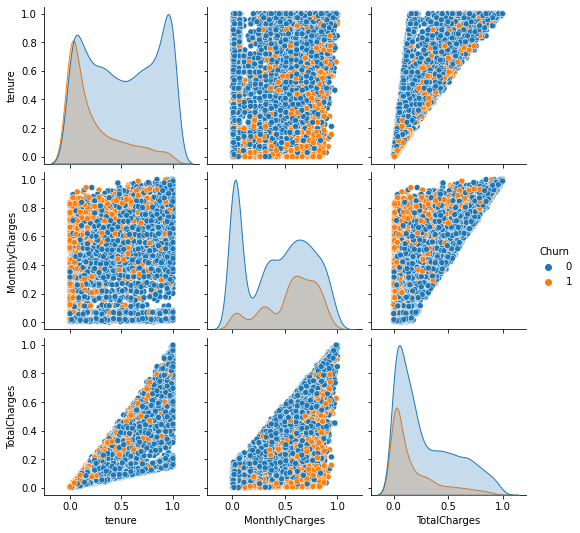

In [ ]:
#plotting the three numeric features with hue as "Churn"
sns.pairplot(df1,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")


1)Tenure is indirectly proportional to Churn

2)Monthly charges are directly proportional to churn

**SPLITTING THE DATA**

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x_s,y_s,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,y_train.shape

((8260, 19), (8260,))

**MODEL BULIDING USING ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Dense(150,input_shape=(19,),activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               3000      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 50)                7550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 55,901
Trainable params: 55,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#COMPILE THE MODEL

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[ 'accuracy'])

In [ ]:
#FIT THE MODEL FOR TRAINING

model.fit(x_train,y_train,epochs=100,batch_size=50)

Epoch 1/100
166/166 [==============================] - 2s 3ms/step - loss: 0.5000 - accuracy: 0.7515
Epoch 2/100
166/166 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.7763
Epoch 3/100
166/166 [==============================] - 1s 3ms/step - loss: 0.4514 - accuracy: 0.7855
Epoch 4/100
166/166 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.7943
Epoch 5/100
166/166 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 0.7962
Epoch 6/100
166/166 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8113
Epoch 7/100
166/166 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8120
Epoch 8/100
166/166 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8238
Epoch 9/100
166/166 [==============================] - 1s 3ms/step - loss: 0.3845 - accuracy: 0.8237
Epoch 10/100
166/166 [==============================] - 1s 5ms/step - loss: 0.3701 - accura

**EVALUATE THE MODEL.**

In [ ]:
model.evaluate(x_test,y_test)

65/65 [==============================] - 0s 2ms/step - loss: 1.0935 - accuracy: 0.8103


[1.0935091972351074, 0.8102613687515259]

In [ ]:
yp=model.predict(x_test)

65/65 [==============================] - 0s 3ms/step


In [ ]:
yp.shape

(2066, 1)

In [ ]:
yp[:5]

array([[6.9708544e-01],
       [9.1049245e-05],
       [1.6935338e-06],
       [8.4050941e-01],
       [1.0171724e-05]], dtype=float32)

In [ ]:
y_test[:5]

4139    1
1692    0
2692    0
7704    1
321     0
Name: Churn, dtype: int64

In [ ]:
y_pred=[]
for i in yp:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

**Compare y_pred and y_test**

In [ ]:
y_pred=np.array(y_pred)

In [ ]:
y_pred[:15]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
y_test=np.array(y_test)

In [ ]:
y_test[:15]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
y_test.shape

(2066,)

In [ ]:
y_pred.shape

(2066,)

**Performance Metrics.**

In [ ]:
#classification report,confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1037
           1       0.77      0.88      0.82      1029

    accuracy                           0.81      2066
   macro avg       0.82      0.81      0.81      2066
weighted avg       0.82      0.81      0.81      2066



Text(69.0, 0.5, 'Actual')

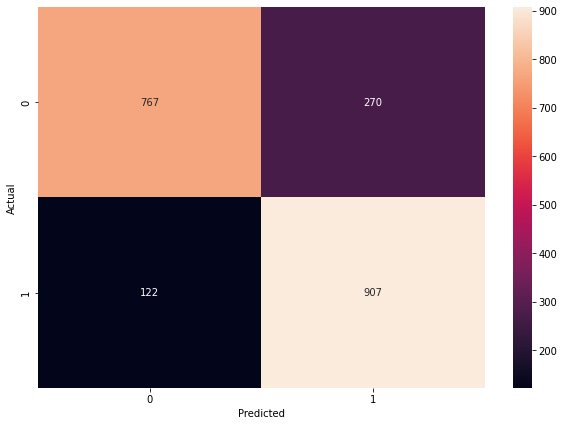

In [ ]:
#confusion matrix
cm=tf.math.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix, roc_curve, auc

In [ ]:
print('Accuracy of the test set : %0.4f'% accuracy_score(y_test,y_pred))

Accuracy of the test set : 0.8103


In [ ]:
print('precision of the test set : %0.4f'% precision_score(y_test,y_pred))

precision of the test set : 0.7706


In [ ]:
print('recall of the test set : %0.4f'% recall_score(y_test,y_pred))

recall of the test set : 0.8814


**Combine original values and predicted values.**

In [ ]:
data = {'orignal_churn':y_test, 'predicted_churn':y_pred}
df_check = pd.DataFrame(data)
df_check.sample(10)

,orignal_churn,predicted_churn
1863,0,0
1168,1,1
771,0,0
1330,0,0
409,0,0
1363,1,1
108,1,1
937,1,1
1398,0,0
1313,1,0


In [ ]:
import joblib

In [ ]:
joblib.dump(model,'model_joblib_ann')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 02:10:27       704240
config.json                                    2023-

['model_joblib_ann']

In [ ]:
model=joblib.load('model_joblib_ann')
model

Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 02:10:26       704240
config.json                                    2023-02-17 02:10:26         2675
metadata.json                                  2023-02-17 02:10:26           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19